In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/big-4-financial-risk-insights-2020-2025/big4_financial_risk_compliance.csv


## Title: Big 4 Financial Risk Trends (2020-2025)

#### Description:
This report analyzes key financial risk trends observed across the Big 4 accounting firms from 2020 to 2025. It covers emerging risk factors, regulatory changes, market disruptions, and strategic responses to financial uncertainties. Key topics include audit risks, compliance challenges, economic downturn effects, cybersecurity threats, and risk management innovations shaping the financial landscape.

## Import dataset

In [2]:
df = pd.read_csv('/kaggle/input/big-4-financial-risk-insights-2020-2025/big4_financial_risk_compliance.csv')

In [3]:
df.head()

,Year,Firm_Name,Total_Audit_Engagements,High_Risk_Cases,Compliance_Violations,Fraud_Cases_Detected,Industry_Affected,Total_Revenue_Impact,AI_Used_for_Auditing,Employee_Workload,Audit_Effectiveness_Score,Client_Satisfaction_Score
0,2020,PwC,2829,51,123,39,Healthcare,114.24,No,57,5.8,8.4
1,2022,Deloitte,3589,185,30,60,Healthcare,156.98,Yes,58,5.3,6.7
2,2020,PwC,2438,212,124,97,Healthcare,131.83,No,76,6.1,6.2
3,2021,PwC,2646,397,55,97,Healthcare,229.11,No,60,5.1,8.6
4,2020,PwC,2680,216,99,46,Healthcare,48.00,No,51,9.1,6.7


In [4]:
df.tail()

,Year,Firm_Name,Total_Audit_Engagements,High_Risk_Cases,Compliance_Violations,Fraud_Cases_Detected,Industry_Affected,Total_Revenue_Impact,AI_Used_for_Auditing,Employee_Workload,Audit_Effectiveness_Score,Client_Satisfaction_Score
95,2022,KPMG,4179,77,58,69,Healthcare,89.79,Yes,74,7.6,5.6
96,2020,Ernst & Young,2119,112,153,59,Tech,182.06,No,42,8.4,9.3
97,2021,Deloitte,3810,463,35,96,Healthcare,349.04,No,55,6.4,6.5
98,2025,Deloitte,1896,110,151,14,Finance,456.08,No,74,8.7,7.1
99,2021,PwC,4473,195,199,58,Finance,235.12,Yes,54,6.4,7.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       100 non-null    int64  
 1   Firm_Name                  100 non-null    object 
 2   Total_Audit_Engagements    100 non-null    int64  
 3   High_Risk_Cases            100 non-null    int64  
 4   Compliance_Violations      100 non-null    int64  
 5   Fraud_Cases_Detected       100 non-null    int64  
 6   Industry_Affected          100 non-null    object 
 7   Total_Revenue_Impact       100 non-null    float64
 8   AI_Used_for_Auditing       100 non-null    object 
 9   Employee_Workload          100 non-null    int64  
 10  Audit_Effectiveness_Score  100 non-null    float64
 11  Client_Satisfaction_Score  100 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 9.5+ KB


In [6]:
df.shape

(100, 12)

In [7]:
df.describe()

,Year,Total_Audit_Engagements,High_Risk_Cases,Compliance_Violations,Fraud_Cases_Detected,Total_Revenue_Impact,Employee_Workload,Audit_Effectiveness_Score,Client_Satisfaction_Score
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2022.320000,2784.520000,277.730000,105.480000,52.700000,272.539000,60.250000,7.490000,7.339000
std,1.780251,1281.863073,135.735174,55.370101,28.311221,139.151401,11.163048,1.516209,1.429127
min,2020.000000,603.000000,51.000000,10.000000,5.000000,33.460000,40.000000,5.000000,5.000000
25%,2021.000000,1768.250000,162.500000,54.500000,27.000000,155.217500,52.750000,6.100000,6.100000
50%,2022.000000,2650.000000,293.000000,114.500000,54.000000,264.450000,60.000000,7.450000,7.350000
75%,2024.000000,4008.750000,395.500000,149.500000,74.500000,406.090000,68.000000,8.825000,8.525000
max,2025.000000,4946.000000,500.000000,200.000000,100.000000,497.060000,80.000000,10.000000,10.000000


In [8]:
df.isnull().sum()

Year                         0
Firm_Name                    0
Total_Audit_Engagements      0
High_Risk_Cases              0
Compliance_Violations        0
Fraud_Cases_Detected         0
Industry_Affected            0
Total_Revenue_Impact         0
AI_Used_for_Auditing         0
Employee_Workload            0
Audit_Effectiveness_Score    0
Client_Satisfaction_Score    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.corr

<bound method DataFrame.corr of     Year      Firm_Name  Total_Audit_Engagements  High_Risk_Cases  \
0   2020            PwC                     2829               51   
1   2022       Deloitte                     3589              185   
2   2020            PwC                     2438              212   
3   2021            PwC                     2646              397   
4   2020            PwC                     2680              216   
..   ...            ...                      ...              ...   
95  2022           KPMG                     4179               77   
96  2020  Ernst & Young                     2119              112   
97  2021       Deloitte                     3810              463   
98  2025       Deloitte                     1896              110   
99  2021            PwC                     4473              195   

    Compliance_Violations  Fraud_Cases_Detected Industry_Affected  \
0                     123                    39        Healthcare   
1

In [11]:
df.columns

Index(['Year', 'Firm_Name', 'Total_Audit_Engagements', 'High_Risk_Cases',
       'Compliance_Violations', 'Fraud_Cases_Detected', 'Industry_Affected',
       'Total_Revenue_Impact', 'AI_Used_for_Auditing', 'Employee_Workload',
       'Audit_Effectiveness_Score', 'Client_Satisfaction_Score'],
      dtype='object')

## Data visualizations 

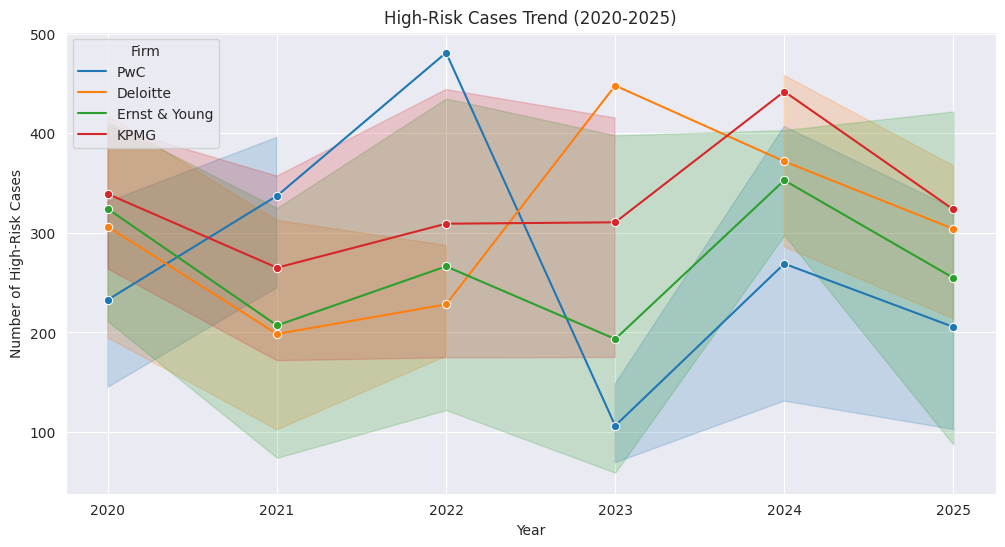

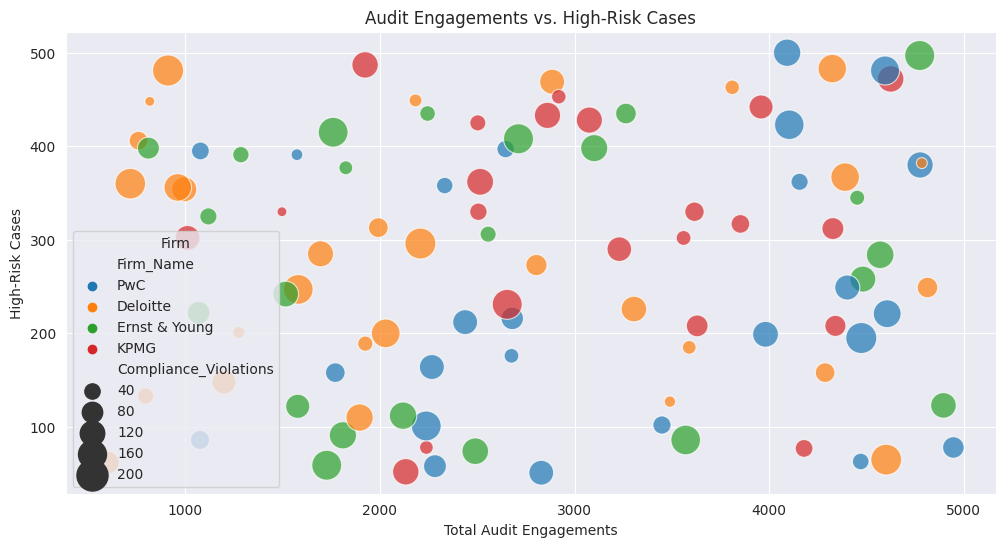

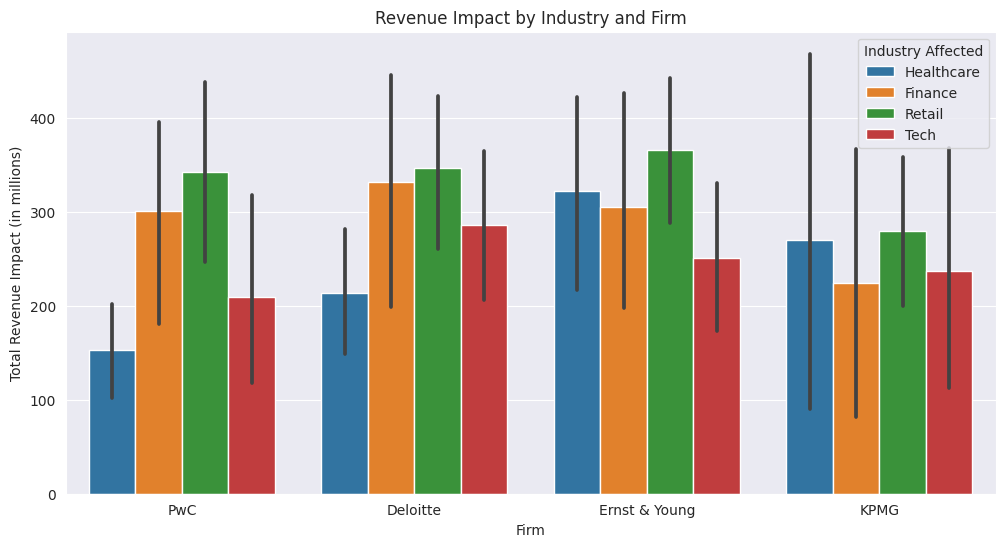

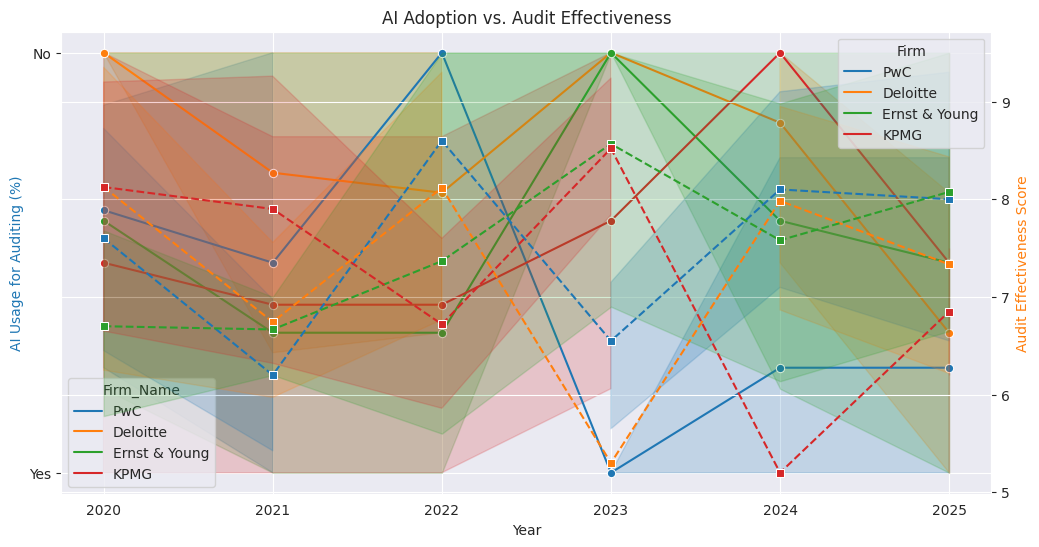

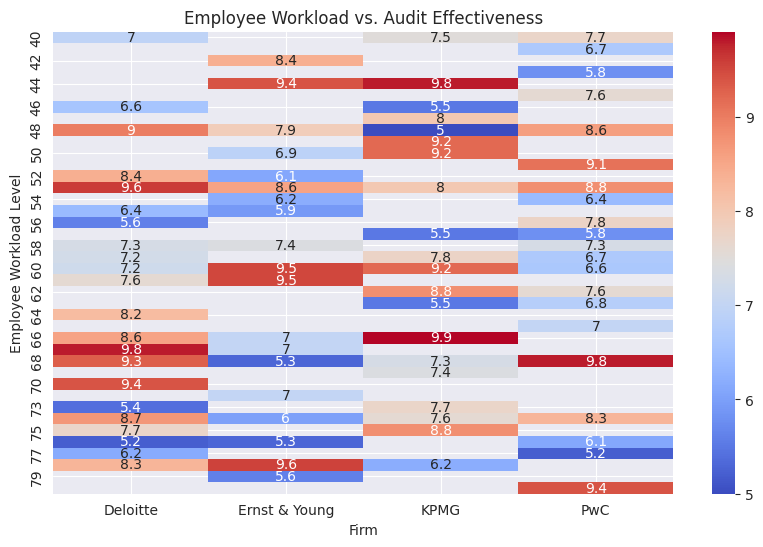

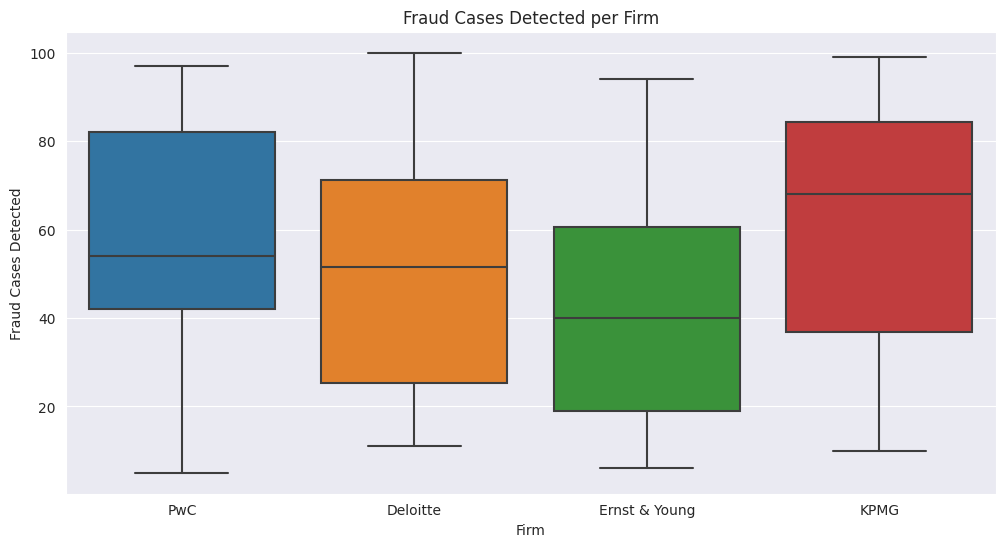

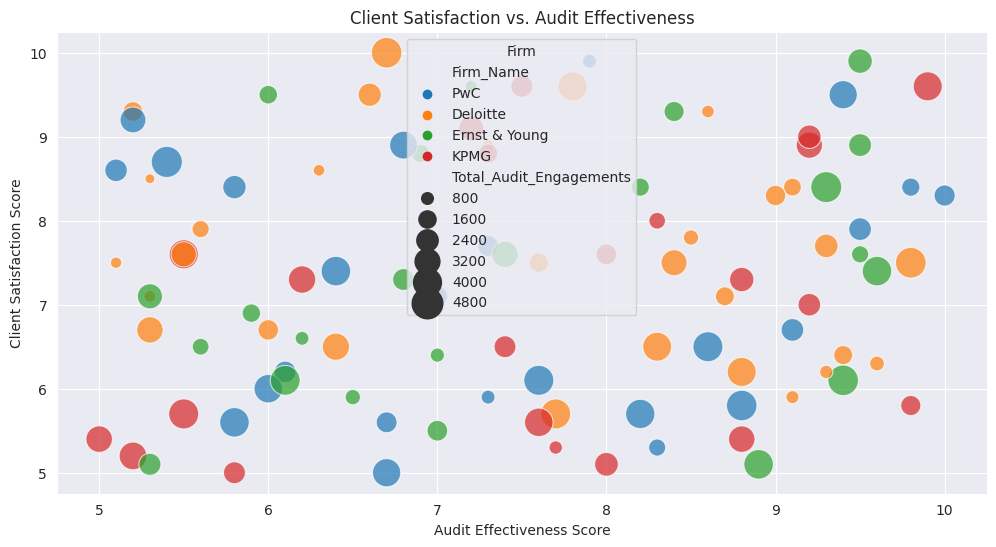

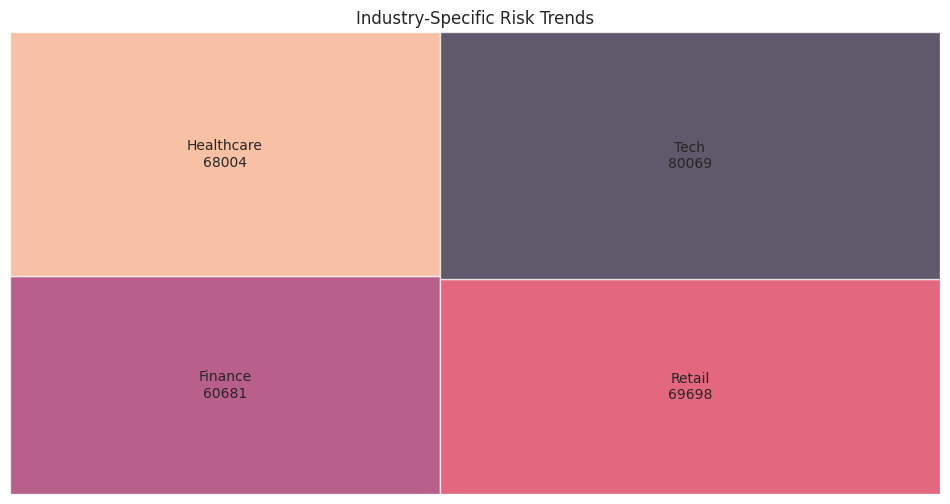

In [12]:
# Set Seaborn style
sns.set_style("darkgrid")

# 1. Trend Analysis Over Time (Line Chart)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='High_Risk_Cases', hue='Firm_Name', marker='o')
plt.title("High-Risk Cases Trend (2020-2025)")
plt.xlabel("Year")
plt.ylabel("Number of High-Risk Cases")
plt.legend(title="Firm")
plt.show()

# 2. Audit Engagements vs. Risk Cases (Bubble Chart)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Total_Audit_Engagements', y='High_Risk_Cases', size='Compliance_Violations', hue='Firm_Name', alpha=0.7, sizes=(50, 500))
plt.title("Audit Engagements vs. High-Risk Cases")
plt.xlabel("Total Audit Engagements")
plt.ylabel("High-Risk Cases")
plt.legend(title="Firm")
plt.show()

# 3. Revenue Impact Due to Risks (Stacked Bar Chart)
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Firm_Name', y='Total_Revenue_Impact', hue='Industry_Affected')
plt.title("Revenue Impact by Industry and Firm")
plt.xlabel("Firm")
plt.ylabel("Total Revenue Impact (in millions)")
plt.legend(title="Industry Affected")
plt.show()

# 4. AI Adoption vs. Audit Effectiveness (Dual Axis Line Chart)
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

sns.lineplot(data=df, x='Year', y='AI_Used_for_Auditing', hue='Firm_Name', marker='o', ax=ax1)
sns.lineplot(data=df, x='Year', y='Audit_Effectiveness_Score', hue='Firm_Name', marker='s', ax=ax2, linestyle="dashed")

ax1.set_xlabel("Year")
ax1.set_ylabel("AI Usage for Auditing (%)", color='tab:blue')
ax2.set_ylabel("Audit Effectiveness Score", color='tab:orange')
plt.title("AI Adoption vs. Audit Effectiveness")
plt.legend(title="Firm")
plt.show()

# 5. Employee Workload vs. Audit Effectiveness (Heatmap)
plt.figure(figsize=(10, 6))
df_pivot = df.pivot_table(index='Employee_Workload', columns='Firm_Name', values='Audit_Effectiveness_Score')
sns.heatmap(df_pivot, cmap="coolwarm", annot=True)
plt.title("Employee Workload vs. Audit Effectiveness")
plt.xlabel("Firm")
plt.ylabel("Employee Workload Level")
plt.show()

# 6. Fraud Detection Effectiveness (Box Plot)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Firm_Name', y='Fraud_Cases_Detected')
plt.title("Fraud Cases Detected per Firm")
plt.xlabel("Firm")
plt.ylabel("Fraud Cases Detected")
plt.show()

# 7. Client Satisfaction vs. Audit Effectiveness (Scatter Plot)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Audit_Effectiveness_Score', y='Client_Satisfaction_Score', hue='Firm_Name', size='Total_Audit_Engagements', alpha=0.7, sizes=(50, 500))
plt.title("Client Satisfaction vs. Audit Effectiveness")
plt.xlabel("Audit Effectiveness Score")
plt.ylabel("Client Satisfaction Score")
plt.legend(title="Firm")
plt.show()

# 8. Industry-Specific Risk Trends (Treemap)
import squarify

plt.figure(figsize=(12, 6))
sizes = df.groupby("Industry_Affected")["Total_Audit_Engagements"].sum()
labels = [f"{ind}\n{size}" for ind, size in zip(sizes.index, sizes.values)]
squarify.plot(sizes=sizes.values, label=labels, alpha=0.7)
plt.title("Industry-Specific Risk Trends")
plt.axis("off")
plt.show()


## Predictive modeling

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [14]:
# Encoding categorical variables
label_encoders = {}
categorical_cols = ['Firm_Name', 'Industry_Affected']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [15]:
# Convert 'Yes'/'No' columns to numeric
df['AI_Used_for_Auditing'] = df['AI_Used_for_Auditing'].map({'Yes': 1, 'No': 0})

# Define features and target
X = df.drop(columns=['High_Risk_Cases'])  # Assuming 'High_Risk_Cases' as target
y = df['High_Risk_Cases']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical columns for scaling
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Scaling only numerical columns
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier()
}

In [16]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.0000
Random Forest Accuracy: 0.0000
SVM Accuracy: 0.0000
Decision Tree Accuracy: 0.0000
KNN Accuracy: 0.0000


## Thank you!!!...upvotes pls...!!